## Regression Model

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [12]:
sess = tf.Session()

In [13]:
batch_size = 25

In [15]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [16]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1,1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

In [17]:
# Add L2 loss operation to graph
loss = tf.reduce_mean(tf.square(my_output - y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [18]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))



Step #25 A = [[6.4131656]]
Loss = 13.142761
Step #50 A = [[8.671858]]
Loss = 3.6314075
Step #75 A = [[9.46906]]
Loss = 1.2682655
Step #100 A = [[9.7221775]]
Loss = 1.1653491


In [19]:
# Evaluate accuracy (loss) on test set
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:1.3
MSE on train:1.15


## Classification Example

In [29]:
ops.reset_default_graph()

In [30]:
sess = tf.Session()

In [31]:
batch_size = 25

In [32]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [33]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

In [34]:
# Add classification loss (cross entropy)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output,
                                                                  labels = y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [35]:
# Run loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [6.352752]
Loss = 2.9031785
Step #400 A = [2.028599]
Loss = 1.0152688
Step #600 A = [0.17546561]
Loss = 0.2637577
Step #800 A = [-0.30848813]
Loss = 0.27628177
Step #1000 A = [-0.44479385]
Loss = 0.26886824
Step #1200 A = [-0.47111043]
Loss = 0.1761581
Step #1400 A = [-0.45675877]
Loss = 0.30719024
Step #1600 A = [-0.45610577]
Loss = 0.26106793
Step #1800 A = [-0.47940573]
Loss = 0.26711297


Accuracy on train set: 0.925
Accuracy on test set: 0.95


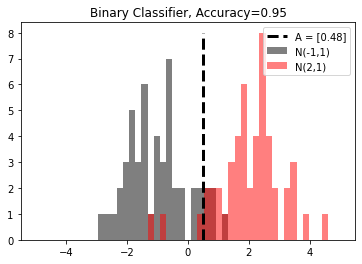

In [37]:
# Evaluate Predictions on test set
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='black')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()